In [1]:
import os
import argparse
import subprocess
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import *
from sklearn.metrics import *

In [2]:
current_directory = os.getcwd()
shell_script_path = os.path.join(current_directory, 'feature_extractor.sh')
print(shell_script_path)

/home/android/project/feature_extractor.sh


In [ ]:
# Cell to get 500 samples by size order 
import os
import shutil

def copy_files_with_least_size(source_folder, destination_folder, num_files=500):
    if os.path.exists(source_folder):
        # Get a list of all files in the source folder
        all_files = [os.path.join(source_folder, file) for file in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, file))]

        # Sort the files by size in ascending order
        sorted_files = sorted(all_files, key=lambda x: os.path.getsize(x))

        # Take the first num_files files (i.e., the smallest ones)
        files_to_copy = sorted_files[:num_files]

        # Create the destination folder if it doesn't exist
        if not os.path.exists(destination_folder):
            os.makedirs(destination_folder)

        # Copy the selected files to the destination folder
        for src_file in files_to_copy:
            dest_file = os.path.join(destination_folder, os.path.basename(src_file))
            # Check if source and destination paths are the same
            if os.path.abspath(src_file) != os.path.abspath(dest_file):
                # Copy the file to the destination folder
                shutil.copy(src_file, dest_file)
            else:
                continue
        print(f"{len(files_to_copy)} files with least size copied from {source_folder} to {destination_folder}")
    else:
        print(f"{source_folder} doesn't exist, skipping this path")

source_folder1 = "/home/android/Desktop/Adware/"
source_folder2 = "/home/android/Desktop/Banking/"
source_folder3 = "/home/android/Desktop/SMS/"
destination_folder1 = "/home/android/ex2/Adware_500/"
destination_folder2 = "/home/android/ex2/Banking_500/"
destination_folder3 = "/home/android/ex2/SMS_500/"
num_files_to_copy = 500

copy_files_with_least_size(source_folder1, destination_folder1, num_files_to_copy)

copy_files_with_least_size(source_folder2, destination_folder2, num_files_to_copy)

copy_files_with_least_size(source_folder3, destination_folder3, num_files_to_copy)




In [ ]:
# Cell to copy all malicious file to one folder
import os
import shutil


def copy_files_to_new_folder(src_folder, dest_folder_name):
    # Create the destination folder as the first child of the source folder
    dest_folder = os.path.join(src_folder, dest_folder_name)

    # Remove the destination folder if it exists
    if os.path.exists(dest_folder):
        shutil.rmtree(dest_folder)

    # Create the destination folder
    os.makedirs(dest_folder)

    # Walk through the source folder recursively
    for root, dirs, files in os.walk(src_folder):
        for file in files:
            # Build the source and destination paths
            src_path = os.path.join(root, file)
            dest_path = os.path.join(dest_folder, file)

            # Check if source and destination paths are the same
            if os.path.abspath(src_path) != os.path.abspath(dest_path):
                # Copy the file to the destination folder
                shutil.copy(src_path, dest_path)
            else:
                print(f"Skipped copying: {src_path} is the same as {dest_path}")


# Specify the source folder
source_folder = "/home/android/ex2/"
dest_folder_name = "All_Malicious"
# Call the function to copy files
copy_files_to_new_folder(source_folder, dest_folder_name)

print(f"All files from {source_folder} copied to {os.path.join(source_folder, dest_folder_name)}")


In [ ]:
# Cell to rename malicious .apk and benign files
from apk_ext_rename import rename_files
from benign_apk_ext_rename import benign_rename_files

mal_folder = "/home/android/ex2/All_Malicious"
benign_folder = "/home/android/Desktop/Benign/"

rename_files(mal_folder)
benign_rename_files(benign_folder)

In [5]:
# Cell to get 300 samples by modified time order (for spliting train and test samples) 
import os
import shutil

def copy_files_with_least_size(source_folder, destination_folder, num_files=500):
    if os.path.exists(source_folder):
        # Get a list of all files in the source folder
        all_files = [os.path.join(source_folder, file) for file in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, file))]

        # Sort the files by size in ascending order
        sorted_files = sorted(all_files, key=lambda x: os.path.getmtime(x))

        # Take the first num_files files (i.e., the smallest ones)
        files_to_copy = sorted_files[:num_files]

        # Create the destination folder if it doesn't exist
        if not os.path.exists(destination_folder):
            os.makedirs(destination_folder)

        # Copy the selected files to the destination folder
        for src_file in files_to_copy:
            dest_file = os.path.join(destination_folder, os.path.basename(src_file))
            # Check if source and destination paths are the same
            if os.path.abspath(src_file) != os.path.abspath(dest_file):
                # Copy the file to the destination folder
                shutil.copy(src_file, dest_file)
                os.remove(src_file)
            else:
                continue
        print(f"{len(files_to_copy)} files copied from {source_folder} to {destination_folder}")
    else:
        print(f"{source_folder} doesn't exist, skipping this path")

source_folder1 = "/home/android/ex2/All_Malicious/"

destination_folder1 = "/home/android/ex2/Malicious_300test"

num_files_to_copy = 300

copy_files_with_least_size(source_folder1, destination_folder1, num_files_to_copy)



300 files with least size copied from /home/android/ex2/All_Malicious/ to /home/android/ex2/Malicious_300test


In [6]:
# Cell to copy all malicious and benign .apk file to a folder
import os
import shutil

mal_destination_folder = "/home/android/ex2/All_Malicious/"
benign_destination_folder = "/home/android/Desktop/Benign/"
all_destination_folder_name = "Mal_Ben"
all_destination_folder = os.path.join(os.path.dirname(os.path.abspath(benign_destination_folder)), all_destination_folder_name)


# Remove the destination folder if it exists
if os.path.exists(all_destination_folder):
    shutil.rmtree(all_destination_folder)

# Create the destination folder
os.makedirs(all_destination_folder)

# Copy files from mal_destination_folder
mal_files = os.listdir(mal_destination_folder)
for file in mal_files:
    src_path = os.path.join(mal_destination_folder, file)
    dest_path = os.path.join(all_destination_folder, file)
    # Check if source and destination paths are the same
    if os.path.abspath(src_path) != os.path.abspath(dest_path):
        # Copy the file to the destination folder
        shutil.copy(src_path, dest_path)
    else:
        continue

# Copy files from benign_destination_folder
ben_files = os.listdir(benign_destination_folder)
for file in ben_files:
    src_path = os.path.join(benign_destination_folder, file)
    dest_path = os.path.join(all_destination_folder, file)
    # Check if source and destination paths are the same
    if os.path.abspath(src_path) != os.path.abspath(dest_path):
        # Copy the file to the destination folder
        shutil.copy(src_path, dest_path)
    else:
        continue

print(f"All files from {mal_destination_folder} and {benign_destination_folder} copied to {all_destination_folder}")


All files from /home/android/ex2/All_Malicious/ and /home/android/Desktop/Benign/ copied to /home/android/Desktop/Mal_Ben


In [7]:
# Cell to initiate the virtual environment and run the AndroPyTool
try:
    # Run the shell script with the provided arguments
    # example_path = '/home/android/project/example.sh'
    arg1 = '/home/android/droidbox_env/bin/activate'
    arg2 = '/home/android/AndroPyTool/androPyTool.py'
    arg3 = '/home/android/Desktop/Mal_Ben/'
    arg4 = 'extracted_feature.csv'
    print(f'Working shell script path: {shell_script_path}')
    result = subprocess.run([shell_script_path, arg1, arg2, arg3, arg4], check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    # print("Script output:", result.stdout)
    for line in result.stdout.splitlines():
        line = line.decode('utf-8').strip()
        print(line)

    for line in result.stderr.splitlines():
        line = line.decode('utf-8').strip()
        print(line)
except subprocess.CalledProcessError as e:
    print("Error running script:", e)
    print("Script error output:", e.stderr)

Working shell script path: /home/android/project/feature_extractor.sh
Activating shell script...
Activated virtual environment: /home/android/droidbox_env/bin/activate
Virtual environment is activated: /home/android/droidbox_env


>>>> AndroPyTool -- STEP 7: Execute features extraction

[*] Number of APKs: 2387
['/home/android/Desktop/Mal_Ben/samples/54dc27fd3e0dfe50dad1a1f701fd0eb12a040211ab884a7c7efe3b0ebe71686c.apk', '/home/android/Desktop/Mal_Ben/samples/benign_81ea6607eb3da7073cb07574eb868850e4418f096f79c02bc3a368361095635d.apk', '/home/android/Desktop/Mal_Ben/samples/benign_7e8b486473ded5ae7ae9c4810b05b229d80f13c82ec28270956ecf6e91daeeed.apk', '/home/android/Desktop/Mal_Ben/samples/0015ae7c27688d45f79170dcea16131ce557912a1a0c5f3b6b0465ee0774a4521cf660303734c47286ca7b57954ba058.apk', '/home/android/Desktop/Mal_Ben/samples/1a0c1551e9f9fb7bb0a2c51e40dd85d0b0b4a4cd6ab1e9df9d641286717b0d56.apk', '/home/android/Desktop/Mal_Ben/samples/benign_afb5973323a924964d8933f4d0b753db16cb463b3295

In [ ]:
# This cell of codes is just a trivial testing, dummy
import subprocess

p = subprocess.Popen(["ls", "-lha"], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
for line in p.stdout.readlines():
    line = line.decode('utf-8').strip()
    print(line)


In [2]:
# Import dataset
data = pd.read_csv("/home/android/Desktop/Mal_Ben/Features_files/test_no_package.csv")
print(data.head())

   label                                           APK Name  \
0      0  54dc27fd3e0dfe50dad1a1f701fd0eb12a040211ab884a...   
1      1  benign_81ea6607eb3da7073cb07574eb868850e4418f0...   
2      1  benign_7e8b486473ded5ae7ae9c4810b05b229d80f13c...   
3      0  0015ae7c27688d45f79170dcea16131ce557912a1a0c5f...   
4      0  1a0c1551e9f9fb7bb0a2c51e40dd85d0b0b4a4cd6ab1e9...   

   PERMISSION-co.gradeup.android.permission.UA_DATA  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   PERMISSION-chat.lesbiandating.permission.C2D_MESSAGE  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0  

In [4]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = "/home/android/Desktop/Mal_Ben/Features_files/test_no_package.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Function to check if "benign" is present in the "APK Name" column and update the "label" column accordingly
def label_benign(row):
    if "benign" in row["APK Name"].lower():
        return 1
    else:
        return 0

# Apply the label_benign function to each row and create a new "label" column
df["label"] = df.apply(label_benign, axis=1)

# Write the updated DataFrame back to the same CSV file
df.to_csv(csv_file_path, index=False)

# Display the updated DataFrame
print(df)


      label                                           APK Name  \
0         0  54dc27fd3e0dfe50dad1a1f701fd0eb12a040211ab884a...   
1         1  benign_81ea6607eb3da7073cb07574eb868850e4418f0...   
2         1  benign_7e8b486473ded5ae7ae9c4810b05b229d80f13c...   
3         0  0015ae7c27688d45f79170dcea16131ce557912a1a0c5f...   
4         0  1a0c1551e9f9fb7bb0a2c51e40dd85d0b0b4a4cd6ab1e9...   
...     ...                                                ...   
2378      1  benign_0ba1417880cc9374b44f0aefce904d1ce06e91d...   
2379      0  cc866dccb11fe9084b8789383697aa1546f9be018d3039...   
2380      1  benign_6625f8f7cfabcb67cf1e397faf318d21d504413...   
2381      1  benign_b5355f4a72ce8b035ad6f6d88984457aa01c537...   
2382      0  66f0dd074c3441c786da8990b65d897e19da5f224d6591...   

      PERMISSION-co.gradeup.android.permission.UA_DATA  \
0                                                    0   
1                                                    0   
2                                

In [43]:
import numpy as np

data = pd.read_csv("/home/android/Desktop/Mal_Ben/Features_files/test_no_package.csv")
# Set a random seed for reproducibility
random_seed = np.random.randint(1, 1000)
np.random.seed(random_seed)

# Shuffle the data to ensure generalization and improve training stability
randm = random_seed
print(randm)
shuffled_data = data.sample(frac=1, random_state=randm)
shuffled_to_save = shuffled_data.reset_index(drop=True, inplace=True)
shuffled_data.reset_index(drop=True)

107


,label,APK Name,PERMISSION-co.gradeup.android.permission.UA_DATA,PERMISSION-chat.lesbiandating.permission.C2D_MESSAGE,PERMISSION-com.appswiz.kodistreamings.permission.C2D_MESSAGE,PERMISSION-com.patcher.lucky.luckypatcher.permission.C2D_MESSAGE,PERMISSION-android.permission.READ_SYNC_STATS,PERMISSION-com.pocketwidget.veinte_minutos.gcm.permission.C2D_MESSAGE,PERMISSION-sinet.startup.inDriver.permission.C2D_MESSAGE,PERMISSION-android.permission.INTERNET,...,APICALL-android.speech,APICALL-android.content.ClipDescription,APICALL-android.support.v4.view.accessibility.AccessibilityManagerCompat,APICALL-java.net.InetAddress,APICALL-android.support.multidex.MultiDexApplication,APICALL-android.widget.MediaController,APICALL-android.support.v4.widget.ExploreByTouchHelper,APICALL-android.content.ContentResolver,APICALL-org.xmlpull.v1.XmlPullParser,APICALL-org.xml.sax.ext.DeclHandler
0,0,7cc9d65f19fcf5818f21ca56f0caeaec937ca31583dba5...,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,70,0
1,0,99546eaa5af9e2ad880f93e03547db31381a8075b9446e...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,d041d45d45717561facfdc9be30896ae21447c32cd2f70...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,12,0
3,1,benign_6cde516b684fb62c35a1aa211de4cfd3b056bf8...,0,0,0,0,0,0,0,1,...,0,2,3,1,0,0,32,12,15,0
4,0,a78ba3a64b2d14fe7ba4cf95622cf6737833a54047d0cf...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,0,33d98c178b9f7075a079fb75d451de2e44df1607599851...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2379,0,65108ed27ab5596f6deff9f7a5597d77e84e7e3a9b1444...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2380,1,benign_02d437b4fa80a95940044b4196a0d4e666caa0d...,0,0,0,0,0,0,0,1,...,0,2,3,3,0,0,32,13,99,0
2381,0,dff1b300797b3a2d561683db35b4d05ee90e20186e64db...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3,0,0


In [45]:
# Drop column and assign label
X = shuffled_data.drop(["label", "APK Name"], axis=1)
y = shuffled_data["label"]  # Target variable

In [46]:
# Split test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
# Training model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
# Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9958071278825996
Precision: 0.995475113122172
Recall: 0.995475113122172
F1 Score: 0.995475113122172


In [49]:
# Save the trained model to a file
import joblib

model_filename = "trained_rf_model.joblib"
joblib.dump(rf_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to trained_rf_model.joblib


In [17]:
# Load the saved model
import joblib

loaded_model = joblib.load(model_filename)

##### Test if the saved and original one are the same
# Evaluation
y_pred = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9874213836477987
Precision: 0.9957081545064378
Recall: 0.9789029535864979
F1 Score: 0.9872340425531914


In [50]:
# Using classification_report to Print Scores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       256
           1       1.00      1.00      1.00       221

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477



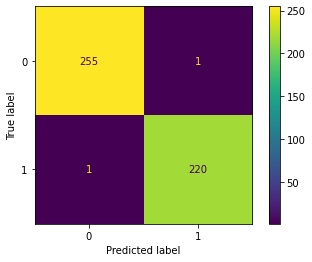

In [51]:
# Plotting a Confusion Matrix with Sklearn
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
vis.plot()
plt.show()

In [20]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X.columns)

Elapsed time to compute the importances: 1279.831 seconds


In [ ]:
import matplotlib.pyplot as plt1

fig, ax = plt1.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt1.show()

In [54]:
import shap as sap

# Create object that can calculate shap values
explainer = sap.TreeExplainer(rf_model)
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

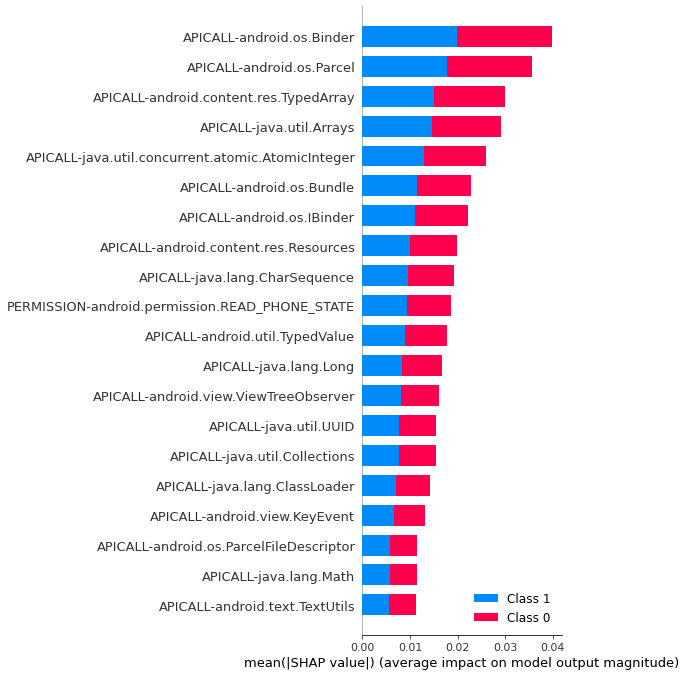

In [55]:
sap.summary_plot(shap_values, X_train, feature_names=X.columns, plot_type="bar")